9543.350366445924


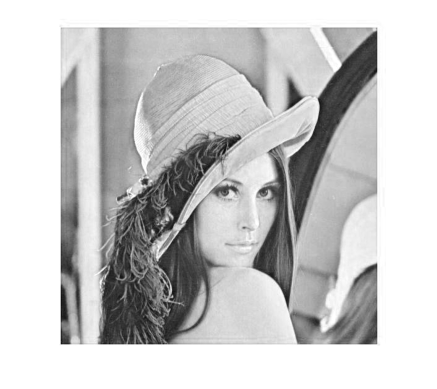

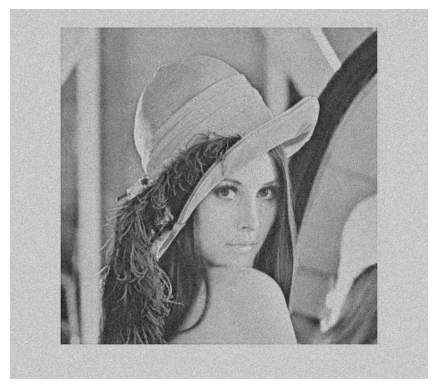

In [9]:
import numpy as np
import matplotlib.pyplot as plt

def make_image():
    n = 100
    w1 = n // 3
    w2 = n // 2
    bw = n // 50
    vp = 255

    imagemat = np.full((n, n), vp, dtype=int)
    imagemat[:, w2-bw:w2+bw] = 0
    imagemat[w1-bw:w1+bw, :] = 0
    imagemat[2*w1-bw:2*w1+bw, :] = 0

    I = imagemat.astype(float)
    return I


# Exemple d'utilisation
#image1 = make_image()
image1=plt.imread('Lena.jpg')
image1=image1.astype(float)
image1=image1[:,:,0]

plt.figure(1)
plt.imshow(image1,cmap='gray')
plt.axis('off')

sigma=15
image_b =image1+sigma*np.random.randn(image1.shape[0],image1.shape[1])
image_b2=image_b.copy()
plt.figure(2)
plt.imshow(image_b,cmap='gray')
plt.axis('off')

print(np.linalg.norm(image1-image_b))

# Equation de chaleur

20255807.80626698


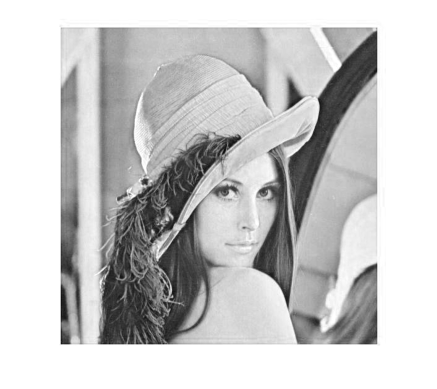

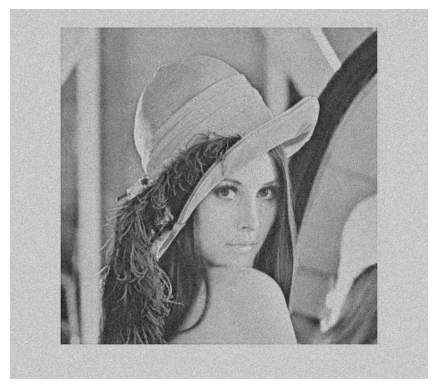

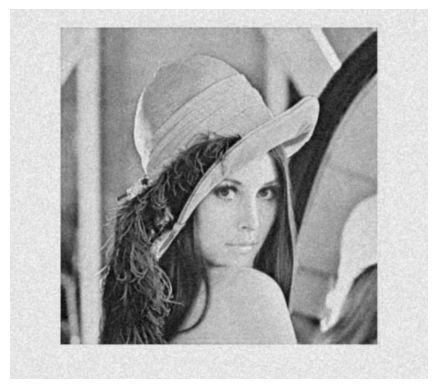

In [10]:
tmax=2
tau = 0.2

def gradient_operators(u):
    """
    Calcule les différences finies dans les directions Nord, Sud, Est et Ouest.
    
    Paramètre:
        u (numpy.ndarray): Matrice 2D des valeurs du champ scalaire.
        
    Retourne:
        tuple: (∇N u, ∇S u, ∇E u, ∇W u)
    """
    grad_N = np.roll(u, -1, axis=0) - u #Nord

    grad_S = np.roll(u, 1, axis=0) - u #Sud

    grad_E = np.roll(u, -1, axis=1) - u #Est

    grad_W = np.roll(u, 1, axis=1) - u #Ouest

    return grad_N, grad_S, grad_E, grad_W

image=image_b.copy()

plt.figure(1)
plt.imshow(image1,cmap='gray')
plt.axis('off')



for m in range(tmax):
    grad_N, grad_S, grad_E, grad_W=gradient_operators(image)
    image=image + tau *(grad_N+ grad_S+ grad_E+ grad_W)

image_chal=image.copy()

plt.figure(2)
plt.imshow(image_b,cmap='gray')
plt.axis('off')

plt.figure(3)
plt.imshow(image_chal,cmap='gray')
plt.axis('off')

print(np.linalg.norm(image1-image_chal)**2)

# Modèle de Malika

14422719.37878511


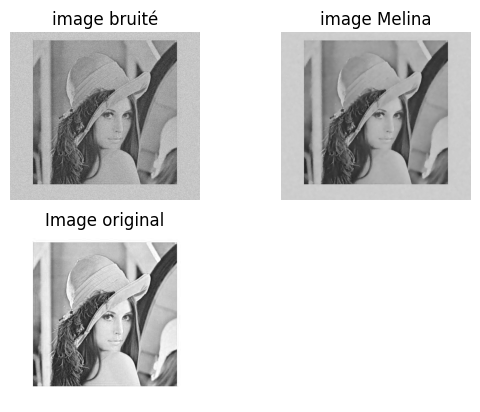

In [11]:
alpha = 5
D = lambda g :np.exp(-g**2/(2*alpha**2))
L = lambda g : 1 / (1+(g**2)/alpha**2)

tmax=100
tau = 0.1

image_b = image1+sigma*np.random.randn(image1.shape[0],image1.shape[1])
image=image_b.copy()

a=plt.subplot(221)
plt.imshow(image,cmap='gray')
plt.axis('off')
a.set_title('image bruité')


grad_N, grad_S, grad_E, grad_W=gradient_operators(image)

for m in range(tmax):
    grad_N, grad_S, grad_E, grad_W=gradient_operators(image)

    image=image + tau * (   (L(np.abs(grad_N))*grad_N)+
                            (L(np.abs(grad_S))*grad_S)+
                            (L(np.abs(grad_W))*grad_W)+
                            (L(np.abs(grad_E))*grad_E))
image_Mal=image.copy()
a=plt.subplot(222)
plt.imshow(image,cmap='gray')
plt.axis('off')
a.set_title('image Melina')


a=plt.subplot(223)

plt.imshow(image1,cmap='gray')
plt.axis('off')
a.set_title('Image original')


print(np.linalg.norm(image-image1)**2)